![caption](data/Imagens/Python.png)

<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

#### **Data Science na Prática 3.0**
*by [sigmoidal.ai](https://sigmoidal.ai)*

---

# Análise dos Dados do Airbnb - *Germany/Berlin*

O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

### Nesse projeto, irei trabalhar com os dados de Belin Germany, e ver quais insights poderão ser extraídos

### Dictionary of variables (Pandas Profiling)

# Variable e Decription 

* `id` - número de id gerado para identificar o imóvel
* `name` - nome da propriedade anunciada
* `host_id` - número de id do proprietário (anfitrião) da propriedade
* `host_name` - Nome do anfitrião
* `neighbourhood_group` - esta coluna não contém nenhum valor válido
* `neighbourhood` - nome do bairro
* `latitude` - coordenada da latitude da propriedade
* `longitude` - coordenada da longitude da propriedade
* `room_type` - informa o tipo de quarto que é oferecido
* `price` - preço para alugar o imóvel
* `minimum_nights` - quantidade mínima de noites para reservar
* `number_of_reviews` - número de reviews que a propriedade possui
* `last_review` - data do último review - campo data - "y-m-d"
* `reviews_per_month` - quantidade de reviews por mês
* `calculated_host_listings_count` - quantidade de imóveis do mesmo anfitrião
* `availability_365` - número de dias de disponibilidade dentro de 365 dias

Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*, analisando as 5 primeiras entradas.

### Methodologies and tools used for this project
* Python 3.9 and its most varied tools and libraries
* Anaconda/JupyterLab
* Methodology CRISP-DM; shearer-2000;
* Supervised methods (i)
* unsupervised methods (ii)

### Python libraries that will be used for work

In [ ]:
#Libraries import for work

import pyforest 
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets
import warnings
from datetime import datetime as dt

# Ignore alert warnings
warnings.filterwarnings('ignore')

# import refinitiv.dataplatform as rdp
# file_name = 'http://data.insideairbnb.com/germany/be/berlin/2021-12-17/visualisations/listings.csv'
# df = pd.read_csv(file_name)

### Importing the Data 

In [13]:
# Getting the Data 

file_path = (r'data/listings_irbnb_germany_berlin.csv')
df = pd.read_csv(file_path)

# file_path = open (r'data/listings_irbnb_germany_berlin.csv')
# df = pd.read_csv(file_path)
#                         #,parse_dates = True)
#                     #,index_col = 'iso_code')


# formatting decimals and scientific notation 
pd.set_option('display.float_format', '{:.3f}'.format)
# pd.set_option('display.float_format', lambda x: '%.0f' % x)

# formatting ... delimiter columns and rows
#pd.set_option('display.max_rows', None )# ou rows...)

# Checking dataset dimensions
print('Python print for me: ', 
          '\n\n''Dataset Dimensions(i-ii):',
          '\nVar dataset owid-convid world:',
          '\nEntries columns_var dimension:',
              df.shape[1], 
          '\nEntries input Line dimension:',
              df.shape[0],'\n'),
print('------------------------------------------\n''')
print('Dbian Technology For Business',
            '\nBlumenau - SC,\n'
            '\n:Best regards;')
print('\n''Claudio Fabian Stychnicki',
            '\n''Data Scientist')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Python print for me:  

Dataset Dimensions(i-ii): 
Var dataset owid-convid world: 
Entries columns_var dimension: 18 
Entries input Line dimension: 17290 

------------------------------------------

Dbian Technology For Business 
Blumenau - SC,

:Best regards;

Claudio Fabian Stychnicki 
Data Scientist


### Check and dimension of datetime and types

In [14]:
# Data Preparation

# Check datetime
# need to cast the date filed as datetime type
#format date para modelagem de médias móveis 

#Checking datetime format and transforming on input
df.last_review = pd.to_datetime(df.last_review)

#Pd.to.datetime tratamento de object/string para format date
df.last_review = pd.to_datetime(df.last_review, format = "%Y-%m-%d")

#verificando a data dos primeiros e últimos registros (atemporal_date) bem como media dos meses median

print('Python print for me variable datetime transforming:','\n',
          '\nDataset datetime types','\n',
          '\nPrimeiros registros de data min: date:',
              df.last_review.min(), 
          '\nMedia registros de data mean (date/meses):', 
              df.last_review.mean(),    
          '\nUltimos_registros de data max: date',
              df.last_review.max())
               
print ('\nDatetime tranformed dtype:',
df.last_review.dtypes,'\n\n')

# Rading three lines
df.head(3)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Python print for me variable datetime transforming: 
 
Dataset datetime types 
 
Primeiros registros de data min: date: 2012-07-08 00:00:00 
Media registros de data mean (date/meses): 2020-02-10 23:04:43.549352192 
Ultimos_registros de data max: date 2021-12-17 00:00:00

Datetime tranformed dtype: datetime64[ns] 




id                                              name  host_id  \
0  2015  Berlin-Mitte Value! Quiet courtyard/very central     2217   
1  3176                   Fabulous Flat in great Location     3718   
2  7071                  BrightRoom with sunny greenview!    17391   

    host_name neighbourhood_group            neighbourhood  latitude  \
0         Ion               Mitte          Brunnenstr. Süd    52.533   
1      Britta              Pankow  Prenzlauer Berg Südwest    52.535   
2  BrightRoom              Pankow           Helmholtzplatz    52.543   

   longitude        room_type  price  minimum_nights  number_of_reviews  \
0     13.404  Entire home/apt     53              90                144   
1     13.418  Entire home/apt     90              92                147   
2     13.415     Private room     33               1                293   

  last_review  reviews_per_month  calculated_host_listings_count  \
0  2021-11-02              2.080                               4   
1  2021-01-01              0.970                               1   
2  2020-03-31              1.950                               1   

   availability_365  number_of_reviews_ltm license  
0               326                     10     NaN  
1               170                      1     NaN  
2                 0                      0     NaN

## Análise das (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?

In [15]:
#Checking variáveis do df.
display(df.dtypes)

id                                         int64
name                                      object
host_id                                    int64
host_name                                 object
neighbourhood_group                       object
neighbourhood                             object
latitude                                 float64
longitude                                float64
room_type                                 object
price                                      int64
minimum_nights                             int64
number_of_reviews                          int64
last_review                       datetime64[ns]
reviews_per_month                        float64
calculated_host_listings_count             int64
availability_365                           int64
number_of_reviews_ltm                      int64
license                                   object
dtype: object

In [16]:
# verificando o final do dataset
df.tail(3)

id                                             name    host_id  \
17287  53844081  One-room apartment with a large private garden!  229695072   
17288  53846012                Cute and cosy apartment in Berlin  326710801   
17289  53847798      Cozy Studio Apartment near centre of Berlin  102805870   

      host_name neighbourhood_group    neighbourhood  latitude  longitude  \
17287    Carlee               Mitte    Osloer Straße    52.557     13.395   
17288  Wiktoria         Lichtenberg        Fennpfuhl    52.529     13.470   
17289   Pribadi               Mitte  Wedding Zentrum    52.541     13.357   

             room_type  price  minimum_nights  number_of_reviews last_review  \
17287  Entire home/apt     60              92                  0         NaT   
17288  Entire home/apt     26              12                  0         NaT   
17289  Entire home/apt     80              28                  0         NaT   

       reviews_per_month  calculated_host_listings_count  availability_365  \
17287                NaN                               1               336   
17288                NaN                               1                23   
17289                NaN                               1               278   

       number_of_reviews_ltm  \
17287                      0   
17288                      0   
17289                      0   

                                                 license  
17287                                                NaN  
17288  First name and Last name: Wiktoria Rychlewski ...  
17289  First name and Last name: Pribadi Soenarto <br...

### Porcentagem de valores ausentes nan no "dataset"

A qualidade de um *dataset* está diretamente relacionada à quantidade de valores ausentes. É importante entender logo no início se esses valores nulos são significativos comparados ao total de entradas.

* É possível ver que a coluna `licence` possui 100% dos seus valores faltantes. 
* As variáveis `reviews_per_month` e `last_review` possuem valores nulos em quase metade das linhas.
* As variáveis `name` e `host_name` têm aproximadamente 0,1% dos valores nulos.

In [ ]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
#Checking missing data
pd.set_option('display.float_format','{:.3f}%'.format)  

print('Python print for me Data Scientits Fabian: \n\n',
          '\nChecking data missing please:','\n\n')
              
with pd.option_context('display.max_rows', (5), 'display.max_columns', None):
  print(((df.isnull().sum() / df.shape[0]) *100).sort_values(ascending = False))

<IPython.core.display.Javascript object>

Python print for me Data Scientits Fabian: 

 
Checking data missing please: 




<IPython.core.display.Javascript object>

license             75.523%
reviews_per_month   18.785%
                      ...  
host_id              0.000%
price                0.000%
Length: 18, dtype: float64


In [ ]:
# Array para conhecer a variável "license"
# Variável de campo input output.io

df.license.unique()

array([nan, '03/Z/RA/003410-18',
       'Genehmigung BA Pankow 03/Z/ZA/002715-17 Genehigungsbescheid vom 16.05.2017',
       ...,
       'First name and Last name: M&amp;F Realestates GmbH <br/> Contact address: Am Speicher 11-15, 10405, Berlin, Deustchalnd <br/>Listing address: Yorckstraße 60 , 10965, Berlin, Deutschland',
       'First name and Last name: Wiktoria Rychlewski <br/> Contact address: Rudolf Seiffer Str 15, 10369, Berlin, Germany <br/>Listing address: Rudolf Seiffert Str 15, 10369, Berlin, Germany',
       'First name and Last name: Pribadi Soenarto <br/> Contact address: Tegeler Str. 41A, 13353, Berlin, Deutschland <br/>Listing address: Tegeler Str. 41A, 13353, Berlin, Deutschland'],
      dtype=object)

In [ ]:
# Entendendendo / Intendimento quanto a distribução dos dados ausentes por ano == var-license. 

# df.set_index('license').isna().sum(level=0)[0:3]

## Excluir valores ausentes

Está é uma primeira opção quando você está lidando com valores nulos do tipo `NaN` no seu *DataFrame*.

Entretanto, ela tende a não ser ideal, pois por causa do valor de uma única célula, você elimina os dados existentes em outras colunas. Esta opção deve ser considerada no caso da quantidade de dados nulos serem pequenos a ponto de não ter representatividade no dataset

Eu consigo excluir tanto linhas com valores ausentes quanto colunas inteiras. Para que o Pandas saiba se a sua inteção é de eliminar linhas (`axis=0`) ou colunas (`axis=1`), você deve informar dentro do método `dropna()`.

## Preencher valores

Esta normalmente é a melhor opção, pois permite que você mantenha dados existentes em outras células.

Uma pergunta que normalmente surge é: "mas eu substituo o valor ausente por qual valor?". A resposta para essa pergunta é: depende.

Existem técnicas simples como usar valor mais frequente, media e mediana, assim como há técnicas mais avançadas que envolvem até mesmo o uso de modelos de *machine learning* cuja função é dizer qual valor usar nesses campos.

Vou mostrar como você pode usar a mediana para preencher os campos ausentes da coluna `ride_duration`, com o uso da função `fillna()`

In [ ]:
df_clean = df.copy()

# eliminar todas as entradas onde existam valores ausentes em `user_gender`
df_clean = df.dropna(subset=['license', 
                             'reviews_per_month',
                             'last_review'], axis=0) # Eixo = 0 linhas / Eixo = 1 Colmns

# comparar o antes e o depois

print('Python print for me:\n',
          '\nChecking data missing please:','\n')
print("Antes:\t{}".format(df.shape))
print("Depois:\t{}".format(df_clean.shape))

Python print for me:
 
Checking data missing please: 

Antes:	(17290, 18)
Depois:	(3671, 18)


In [ ]:
#Checagem de dados ausentes
df_clean.isnull().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
number_of_reviews_ltm             0
license                           0
dtype: int64

In [ ]:
# df_clean.columns

In [ ]:
# df_clean.loc[1050:2000]. reset_index()

### Gruping

In [ ]:
# df_clean.dtypes

In [ ]:
# df.iloc[100: , 9:]

### Tipo de distribuição das variáveis

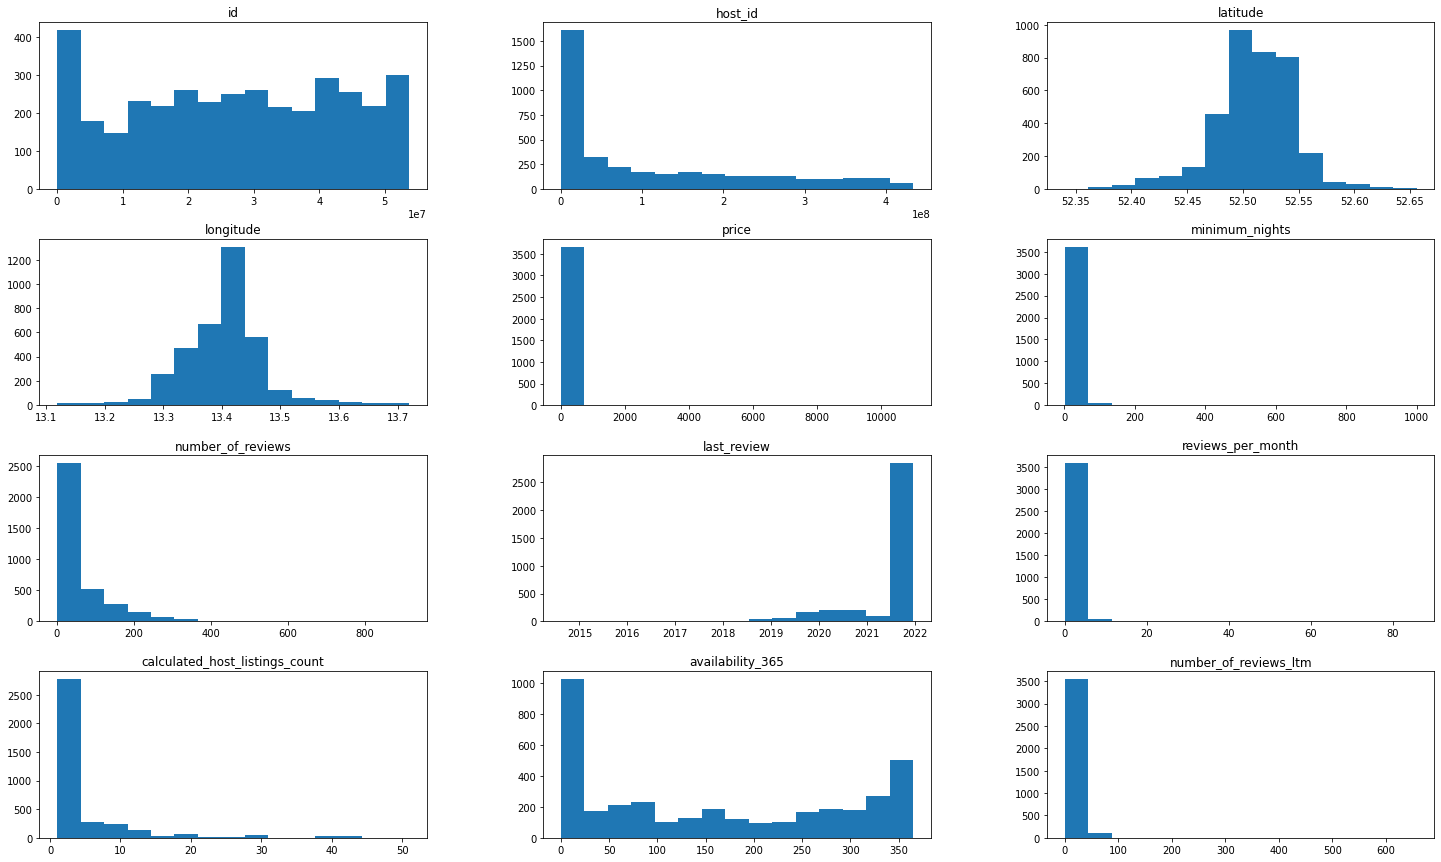

In [ ]:
# plotar o histograma das variáveis numéricas
df_clean.hist(bins=15, figsize=(25, 15), grid = False);

### Cheking se há *outliers* presentes

Pela distribuição do histograma, é possível verificar indícios da presença de *outliers*. Olhe por exemplo as variáveis `price`, `minimum_nights` e `calculated_host_listings_count`.

Os valores não seguem uma distruição, e distorcem toda a representação gráfica. Para confirmar, há duas maneiras rápidas que auxiliam a detecção de *outliers*. São elas:

* Resumo estatístico por meio do método `describe()`
* Plotar `boxplots` para a variável.

## Limpando Outliers

Para tratar dos outliers desse conjunto de dados, iremos analisar a distribuição estatística, plotar boxplots e calcular os limites utilizando a regra do IQR Score.

Primeiramente, vamos lembrar o que é o IQR.

O IQR é calculado subtraindo o Terceiro Quartil (75%) pelo Primeiro Quartil (25%).

# IQR = Q3 - Q1

Vamos dar uma olhada nos nossos dados e ver o que identificamos.


In [ ]:
# ver o resumo estatístico das variáveis numéricas dataset original
pd.set_option('display.float_format','{:.3f}'.format)  
df[['price', 
    'minimum_nights', 
    'number_of_reviews', 
    'reviews_per_month',
    'calculated_host_listings_count', 
    'availability_365']].describe().T

<IPython.core.display.Javascript object>

count   mean     std   min    25%    50%  \
price                          17290.000 75.309 140.855 0.000 35.000 55.000   
minimum_nights                 17290.000 10.406  36.434 1.000  2.000  3.000   
number_of_reviews              17290.000 23.868  53.383 0.000  1.000  5.000   
reviews_per_month              14042.000  0.725   1.562 0.010  0.080  0.260   
calculated_host_listings_count 17290.000  2.993   6.580 1.000  1.000  1.000   
availability_365               17290.000 86.484 127.706 0.000  0.000  0.000   

                                   75%       max  
price                           85.000 10999.000  
minimum_nights                   5.000  1124.000  
number_of_reviews               19.000   916.000  
reviews_per_month                0.840    85.830  
calculated_host_listings_count   2.000    51.000  
availability_365               163.000   365.000

Olhando o resumo estatístico acima, podemos confirmar algumas hipóteses como:

* A variável `price` possui 75% do valor abaixo de 85, porém seu valor máximo é 10999.
* A quantidade mínima de noites (`minimum_nights`) está acima de 365 dias no ano.
* Fato (`minimum_nights`) não condiz com a realizade.
* Valor "max" provavelmene está com Outliers

### FCA
* Fato: valores discrepantes com outliers principalmente os imóveis mais caros;
* Causa: precisando de limpesa para equalizar melhor as variáveis de price, minimum_nights e reviews_per_month;
* Ação: tratamento - normatizar para que consigamos obter uma melhor compreenção dos valores reais.

In [ ]:
# identificando os outliers para a variável price
q1_price = df_clean.price.quantile(.25)
q3_price = df_clean.price.quantile(.75)
IQR_price = q3_price - q1_price
print('Python print for me:''\n'),
print('Interquartile range dimensions IQR:',
      '\n\nIQR = DAS VARIÁVEIS PRICE: ', IQR_price)

# definindo os limites                                       
sup_price = q3_price + 1.5 * IQR_price
inf_price = q1_price - 1.5 * IQR_price

print('Limite superior de price: ', sup_price)
print('Limite inferior de price: ', inf_price)


Python print for me:

Interquartile range dimensions IQR: 

IQR = DAS VARIÁVEIS PRICE:  65.0
Limite superior de price:  215.5
Limite inferior de price:  -44.5


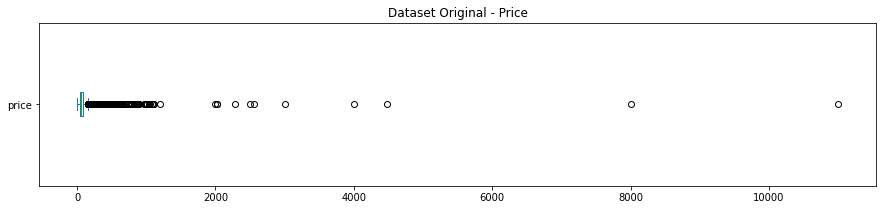

Python print for me list below:

Python print for me average number of entries general: 17290

Python print for me average number of entries 45.00: 10556
Python print for me the average percentage representing the total entries: 61.0526%
Python print for me average number of entries general: 17290

Python print for me average number of entries 160.00: 6831
Python print for me the average percentage representing the total entries: 39.5084%


In [ ]:
#plot graph boxplot
fig, ax = plt.subplots(figsize=(15,3))
df.price.plot(kind='box', vert=False);
ax.set_title('Dataset Original - Price')
plt.show()

# verificando o conjunto original
print('Python print for me list below:''\n'),
print('Python print for me average number of entries general: ''{}''\n'.format(df.shape[0]))
print('Python print for me average number of entries 45.00: ''{}'.format(len(df[df.price > 45.00])))
print('Python print for me the average percentage representing the total entries: ''{:.4f}%'.format((len(df[df.price > 45.00]) / df.shape[0])*100))

print('Python print for me average number of entries general: ''{}''\n'.format(df.shape[0]))
print('Python print for me average number of entries 160.00: ''{}'.format(len(df[df.price > 65.00])))
print('Python print for me the average percentage representing the total entries: ''{:.4f}%'.format((len(df[df.price > 65.00]) / df.shape[0])*100))

In [ ]:
### Explorando as correlações com Target
df_clean.corr()['price'].sort_values(ascending=False)

price                             1.000
availability_365                  0.338
calculated_host_listings_count    0.243
id                                0.134
reviews_per_month                 0.101
number_of_reviews                 0.086
host_id                           0.083
number_of_reviews_ltm             0.082
latitude                          0.052
minimum_nights                   -0.003
longitude                        -0.047
Name: price, dtype: float64

In [ ]:
# identificando os outliers para a variável minimum_nights
q1_minimum_nights = df_clean.minimum_nights.quantile(.25)
q3_minimum_nights = df_clean.minimum_nights.quantile(.75)
IQR_minimum_nights = q3_minimum_nights - q1_minimum_nights
print('Python print for me:''\n'),
print('IQR da variável minimum_nights: ', IQR_minimum_nights)

# definindo os limites                                       
sup_minimum_nights = q3_minimum_nights + 1.5 * IQR_minimum_nights
inf_minimum_nights = q1_minimum_nights - 1.5 * IQR_minimum_nights

print('Limite superior de minimum_nights: ', sup_minimum_nights)
print('Limite inferior de minimum_nights: ', inf_minimum_nights)

Python print for me:

IQR da variável minimum_nights:  3.0
Limite superior de minimum_nights:  8.5
Limite inferior de minimum_nights:  -3.5


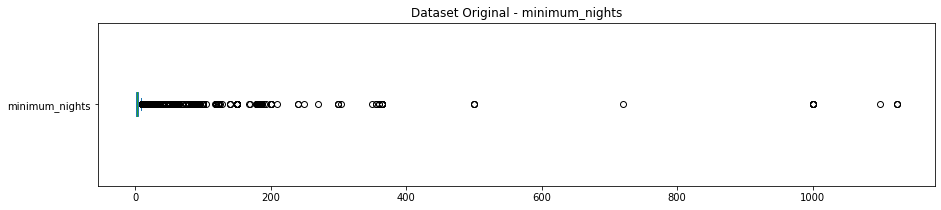

Python print for me:

Python print for me number of entries general: 17290

Python print for me number of entries general acima de 335.5: 2618

Python print for me number of entries general representam: 15.14% 


In [ ]:
#plot graph boxplot
fig, ax = plt.subplots(figsize=(15,3))
df.minimum_nights.plot(kind='box', vert=False);
ax.set_title('Dataset Original - minimum_nights')
plt.show()

# verificando o conjunto original
print('Python print for me:''\n'),
print('Python print for me number of entries general: ''{}''\n'.format(df.shape[0]))
print('Python print for me number of entries general acima de 335.5: ''{}''\n'.format(len(df[df.minimum_nights > 7.0])))
print('Python print for me number of entries general representam: ''{:.2f}% '.format((len(df[df.minimum_nights > 7.0]) / df.shape[0])*100))

In [ ]:
# limpando o dataset
df_clean = df.copy()

df_clean.drop(df_clean[df_clean.price > 335.5].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.price == 0.0].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights > 12].index, axis=0, inplace=True)
print('Python print for me:''\n'),
print('Shape antes da limpeza: ', df.shape)
print('Shape após a limpeza: ',df_clean.shape)


Python print for me:

Shape antes da limpeza:  (17290, 18)
Shape após a limpeza:  (14924, 18)


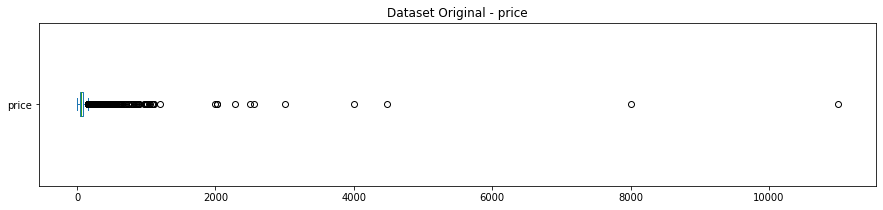

Python print for me:

O dataset possui 17290 lines
192 Entradas acima de 335.5
Representam 1.11% do dataset


In [ ]:
#plot graph boxplot
fig, ax = plt.subplots(figsize=(15,3))
df.price.plot(kind='box', vert=False);
ax.set_title('Dataset Original - price')
plt.show()

# plotando novamente o boxplot original
print('Python print for me:''\n'),
print("O dataset possui {} lines".format(df.shape[0]))
print("{} Entradas acima de 335.5".format(len(df[df.price > 335.5])))
print("Representam {:.2f}% do dataset".format((len(df[df.price > 335.5]) / df.shape[0])*100))

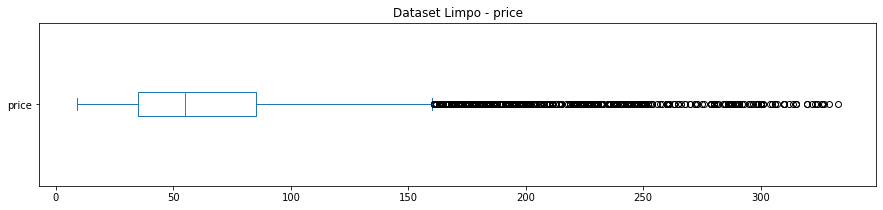

Python print for me:

Tamanho original: 17290 colunas
Tamanho atual: 14924 colunas


In [ ]:
# verificando o conjunto limpo
fig, ax = plt.subplots(figsize=(15,3))
df_clean.price.plot(kind='box', vert=False);
ax.set_title('Dataset Limpo - price')
plt.show()
print('Python print for me:''\n'),
print("Tamanho original: {} colunas".format(df.shape[0]))
print("Tamanho atual: {} colunas".format(df_clean.shape[0]))

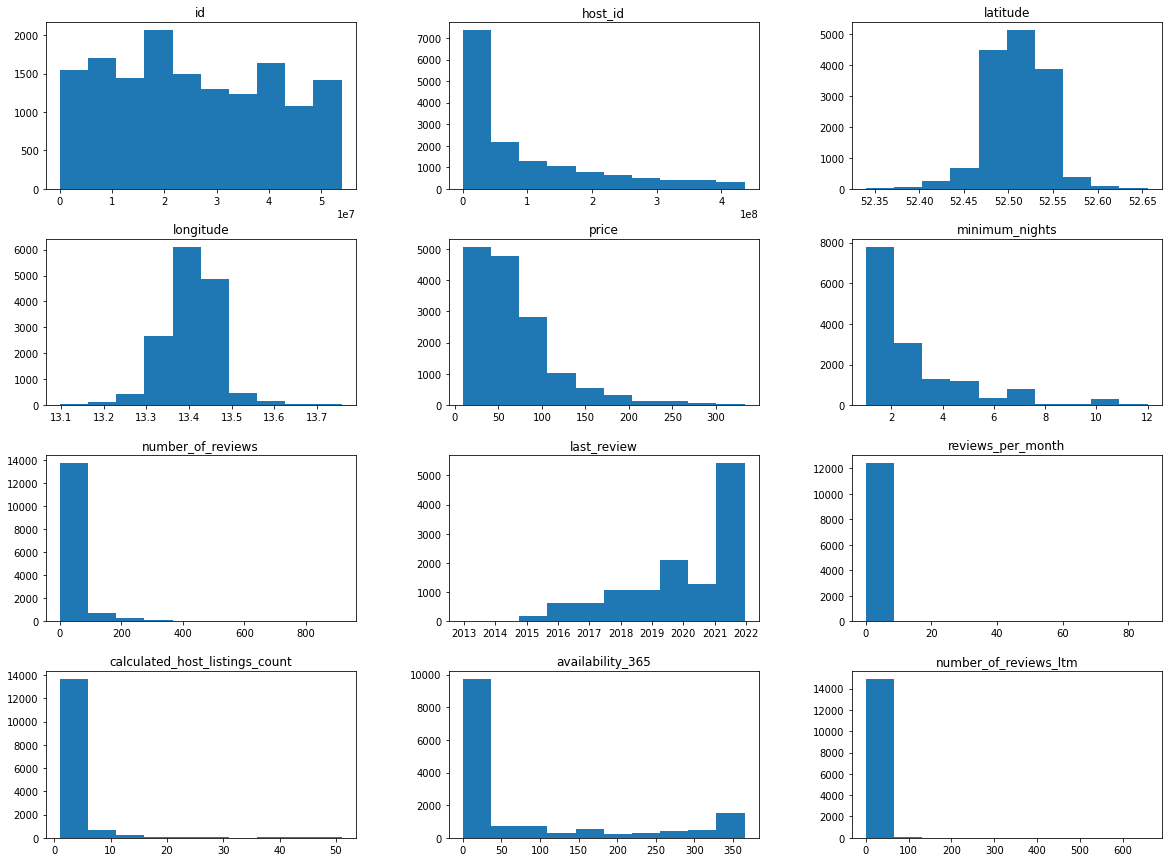

In [ ]:
# verificando as distribuições
df_clean.hist(figsize=(20,15), grid=False);

### Describe para análise das variáeis tratadas e normatizadas análise "descritiva"

* Variável price está devidamente normatizada e com valores dentro do que seria algo mais próximo da realizade
* Minimum_nights também foi normatizada, trazendo coerência lógica

In [ ]:
#análise descritiva das variáveis tratadas (normatizadas)
df_clean.describe().round(1)

id       host_id  latitude  longitude     price  \
count    14924.000     14924.000 14924.000  14924.000 14924.000   
mean  25630191.500  95036638.700    52.500     13.400    68.600   
std   15431251.200 109581457.700     0.000      0.100    47.500   
min       7071.000      2164.000    52.300     13.100     9.000   
25%   12337498.500  13127981.200    52.500     13.400    35.000   
50%   23518116.000  44973439.500    52.500     13.400    55.000   
75%   39350680.500 146188594.200    52.500     13.400    85.000   
max   53846012.000 435875578.000    52.700     13.800   333.000   

       minimum_nights  number_of_reviews  reviews_per_month  \
count       14924.000          14924.000          12449.000   
mean            2.900             25.300              0.800   
std             2.000             55.700              1.600   
min             1.000              0.000              0.000   
25%             1.000              1.000              0.100   
50%             2.000              5.000              0.300   
75%             4.000             20.000              0.900   
max            12.000            916.000             85.800   

       calculated_host_listings_count  availability_365  number_of_reviews_ltm  
count                       14924.000         14924.000              14924.000  
mean                            2.700            77.800                  4.000  
std                             6.100           124.300                 14.100  
min                             1.000             0.000                  0.000  
25%                             1.000             0.000                  0.000  
50%                             1.000             0.000                  0.000  
75%                             2.000           118.200                  3.000  
max                            51.000           365.000                658.000

### Preços médios dos aluguéis

* Valor médio dos aluguéis ficou em torno de $ 68.55 para um mínimum_niths em torno de 2 (duas)


In [ ]:
# Estatística das variáveis numéricas
df_clean[['price', 
    'minimum_nights',
    'number_of_reviews',
    'reviews_per_month',
    'calculated_host_listings_count',
    'availability_365']].describe().T

count   mean     std   min    25%    50%  \
price                          14924.000 68.560  47.517 9.000 35.000 55.000   
minimum_nights                 14924.000  2.945   2.047 1.000  1.000  2.000   
number_of_reviews              14924.000 25.294  55.685 0.000  1.000  5.000   
reviews_per_month              12449.000  0.764   1.642 0.010  0.080  0.270   
calculated_host_listings_count 14924.000  2.690   6.085 1.000  1.000  1.000   
availability_365               14924.000 77.828 124.339 0.000  0.000  0.000   

                                   75%     max  
price                           85.000 333.000  
minimum_nights                   4.000  12.000  
number_of_reviews               20.000 916.000  
reviews_per_month                0.900  85.830  
calculated_host_listings_count   2.000  51.000  
availability_365               118.250 365.000

Resumo estatístico descritiva por variável e importância.

Olhando o resumo estatístico acima, podemos confirmar algumas hipóteses como:

* A variável `price` possui 75% do valor abaixo de 85000, porém seu valor máximo é 333.00.
* A média ponderada da variável "price" ficou em 68.00 com media apontando para 55.00 e provavelmene dependendo do perfil do imóvel, com um mímimo de $ 9.00 
* A quantidade de minimum_nigths normatizada, ficou com um mínimo 2 duas noites e máximo 12 noites, algo mais dentro da realidade;

#### Boxplot para minimum_nights


### Taking into account the number of nights, minimum, average and maximum indicators

Python list below:

Minimum_Nights: Valores acima de 2 dias nights:
Python print for me average number of entries:9363
Python print for me average number of entries percentil: 54.1527%
Minimum_Nights: Valores acima de 4 dias nights:
Python print for me average number of entries:5015
Python print for me average number of entries percentil: 29.0052%
Minimum_Nights: Valores acima de 12 dias nights:
Python print for me average number of entries:2184
Python print for me average number of entries percentil: 12.6316%
Minimum_Nights: Valores acima de 30 dias nights:
Python print for me average number of entries:1028
Python print for me average number of entries percentil: 5.9456%


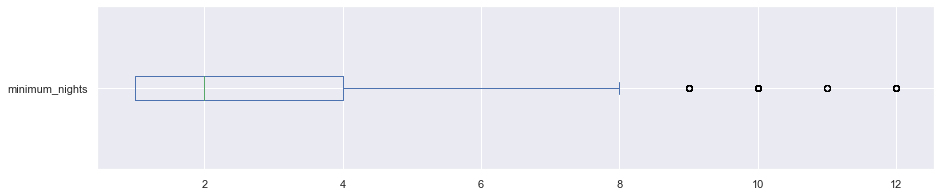

In [ ]:
#ndicators of the minimum of nights with 30, 12, 4 and 2 nights, so that we can intercede the dynamics especially in Berlin - Germany
# **Closing 100 percent of occupations**

print('Python list below:''\n'),

print('Minimum_Nights: Valores acima de 2 dias nights:')
print('Python print for me average number of entries:''{}'.format(len(df[df.minimum_nights > 2])))
print('Python print for me average number of entries percentil: ''{:.4f}%'.format((len(df[df.minimum_nights > 2]) / df.shape[0])*100))
print('Minimum_Nights: Valores acima de 4 dias nights:')
print('Python print for me average number of entries:''{}'.format(len(df[df.minimum_nights > 4])))
print('Python print for me average number of entries percentil: ''{:.4f}%'.format((len(df[df.minimum_nights > 4]) / df.shape[0])*100))
print('Minimum_Nights: Valores acima de 12 dias nights:')
print('Python print for me average number of entries:''{}'.format(len(df[df.minimum_nights > 12])))
print('Python print for me average number of entries percentil: ''{:.4f}%'.format((len(df[df.minimum_nights > 12]) / df.shape[0])*100))
print('Minimum_Nights: Valores acima de 30 dias nights:')
print('Python print for me average number of entries:''{}'.format(len(df[df.minimum_nights > 30])))
print('Python print for me average number of entries percentil: ''{:.4f}%'.format((len(df[df.minimum_nights > 30]) / df.shape[0])*100))

df_clean.minimum_nights.plot(kind='box', vert=False, figsize=(15, 3))
plt.show()

### Conclusion about minimum Nights

### Levando em cosideração a análise descritiva acima, podemos comcluir que:
* Primeiramente, que os dados foram bem tratados;
* A média de ocupação de 2 noites com (54.1527%) é a campeã em Berlin, seguida por 4 noites com (29.0052%) e o restante se disbribiu com 12 e 39 dias, fechando 100%


In [ ]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
((df_clean.isnull().sum() / df_clean.shape[0]).sort_values(ascending=False))

license                          0.743
reviews_per_month                0.166
last_review                      0.166
name                             0.002
host_name                        0.001
minimum_nights                   0.000
number_of_reviews_ltm            0.000
availability_365                 0.000
calculated_host_listings_count   0.000
number_of_reviews                0.000
id                               0.000
room_type                        0.000
longitude                        0.000
latitude                         0.000
neighbourhood                    0.000
neighbourhood_group              0.000
host_id                          0.000
price                            0.000
dtype: float64

### **Q4. Qual a correlação existente entre as variáveis**

In [ ]:
# criar uma matriz de correlação
matriz_corr = df_clean[['price',
                 'minimum_nights',
                 'number_of_reviews', 
                 'reviews_per_month', 
                 'calculated_host_listings_count',
                 'availability_365']].corr()
# mostrar a matriz de correlação
matriz_corr

price  minimum_nights  number_of_reviews  \
price                           1.000          -0.003              0.086   
minimum_nights                 -0.003           1.000             -0.099   
number_of_reviews               0.086          -0.099              1.000   
reviews_per_month               0.101          -0.148              0.620   
calculated_host_listings_count  0.243          -0.136              0.072   
availability_365                0.338          -0.134              0.272   

                                reviews_per_month  \
price                                       0.101   
minimum_nights                             -0.148   
number_of_reviews                           0.620   
reviews_per_month                           1.000   
calculated_host_listings_count              0.130   
availability_365                            0.313   

                                calculated_host_listings_count  \
price                                                    0.243   
minimum_nights                                          -0.136   
number_of_reviews                                        0.072   
reviews_per_month                                        0.130   
calculated_host_listings_count                           1.000   
availability_365                                         0.384   

                                availability_365  
price                                      0.338  
minimum_nights                            -0.134  
number_of_reviews                          0.272  
reviews_per_month                          0.313  
calculated_host_listings_count             0.384  
availability_365                           1.000

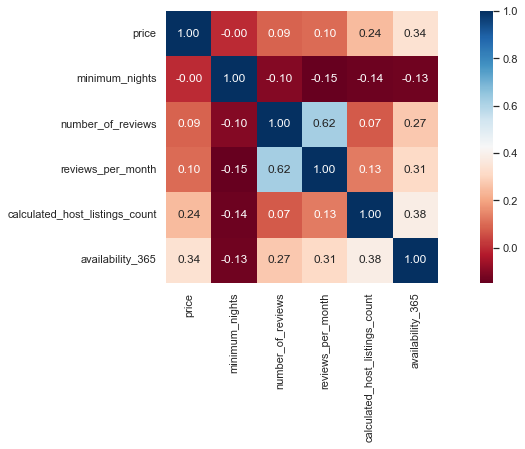

In [ ]:
# plotar um heatmap a partir das correlações

sns.set(rc = {'figure.figsize':(15,5)})
sns.heatmap(matriz_corr, 
            cmap='RdBu', 
            fmt='.2f', 
            square=True, 
            linecolor= 'white', annot=True);


### **Q5. Qual o tipo de imóvel mais alugado no Airbnb?**

In [ ]:
# mostrar a quantidade de cada tipo de imóvel disponível

print("List Below = Qtde por tipo de Imóveis {} ".format(df_clean.shape[0]))
df_clean.room_type.value_counts()

List Below = Qtde por tipo de Imóveis 14924 


Entire home/apt    8017
Private room       6580
Shared room         183
Hotel room          144
Name: room_type, dtype: int64

In [ ]:
# mostrar a porcentagem de cada tipo de imóvel disponível

print("List Below = Percentual por tipo de Imóveis {} ".format(df_clean.shape[0]))
df_clean.room_type.value_counts() / df_clean.shape[0]

List Below = Percentual por tipo de Imóveis 14924 


Entire home/apt   0.537
Private room      0.441
Shared room       0.012
Hotel room        0.010
Name: room_type, dtype: float64

### **Q6. Qual a localidade mais cara do dataset - Germany Berlin?**



In [ ]:
# ver preços por bairros, na média

print("List Below = Localidade por tipo de Imóveis {} ".format(df_clean.shape[0]))
df_clean.groupby(['neighbourhood_group']).price.mean().sort_values(ascending = False)

List Below = Localidade por tipo de Imóveis 14924 


neighbourhood_group
Spandau                    91.978
Mitte                      77.443
Pankow                     73.944
Charlottenburg-Wilm.       73.944
Tempelhof - Schöneberg     68.616
Treptow - Köpenick         67.695
Marzahn - Hellersdorf      66.862
Friedrichshain-Kreuzberg   66.264
Steglitz - Zehlendorf      65.077
Lichtenberg                57.870
Neukölln                   54.144
Reinickendorf              53.438
Name: price, dtype: float64

In [ ]:
# ver preços por bairros, na média

print("List Below = Percentual por tipo de Imóveis {} ".format(df_clean.shape[0]))
df_clean.groupby(['neighbourhood_group']).price.mean().sort_values(ascending = False) / df_clean.shape[0]*100

List Below = Percentual por tipo de Imóveis 14924 


neighbourhood_group
Spandau                    0.616
Mitte                      0.519
Pankow                     0.495
Charlottenburg-Wilm.       0.495
Tempelhof - Schöneberg     0.460
Treptow - Köpenick         0.454
Marzahn - Hellersdorf      0.448
Friedrichshain-Kreuzberg   0.444
Steglitz - Zehlendorf      0.436
Lichtenberg                0.388
Neukölln                   0.363
Reinickendorf              0.358
Name: price, dtype: float64

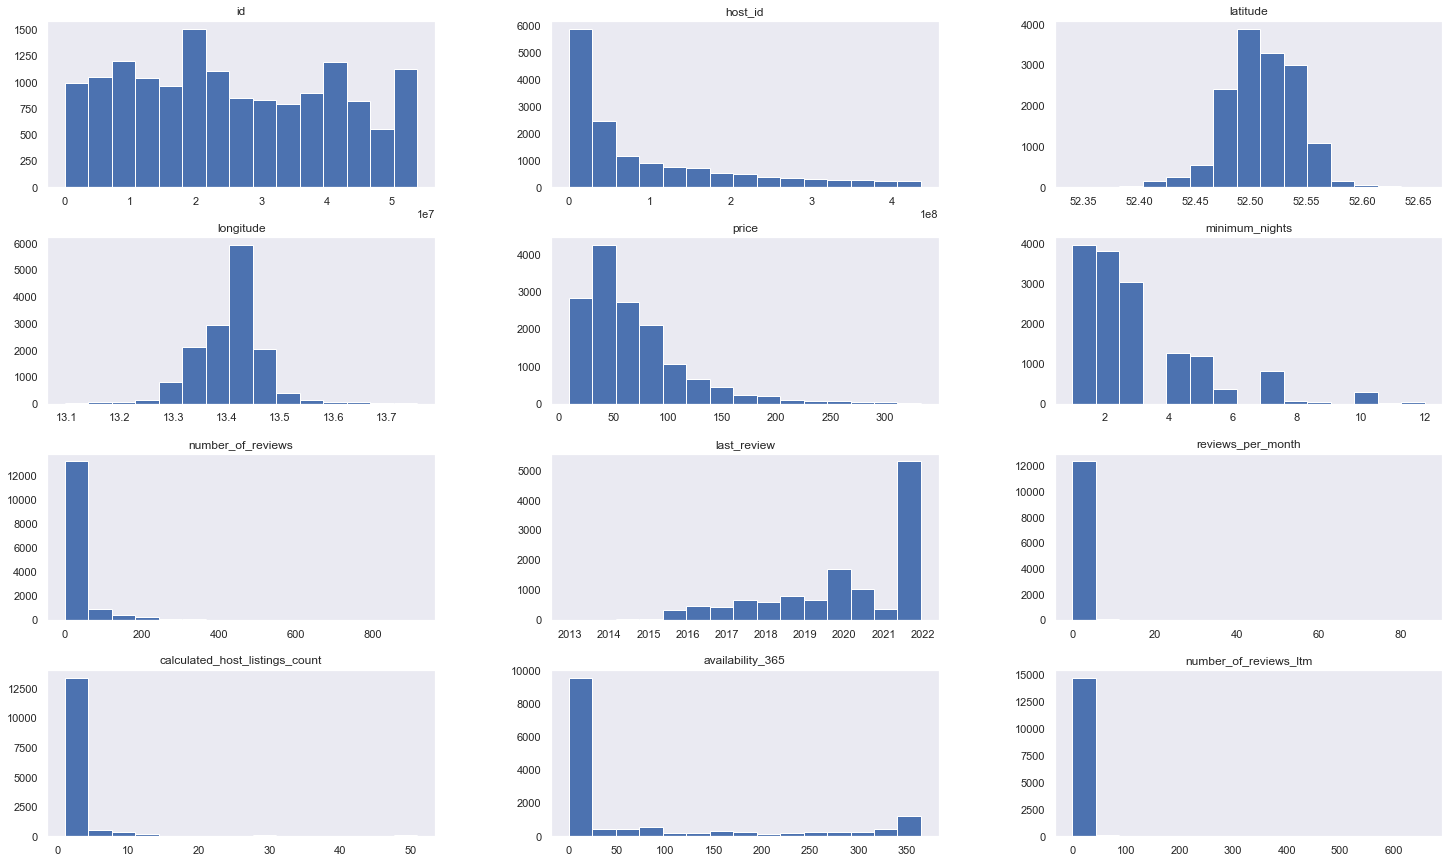

In [ ]:
df_clean.hist(bins=15, figsize=(25, 15), grid = False);

<IPython.core.display.Javascript object>

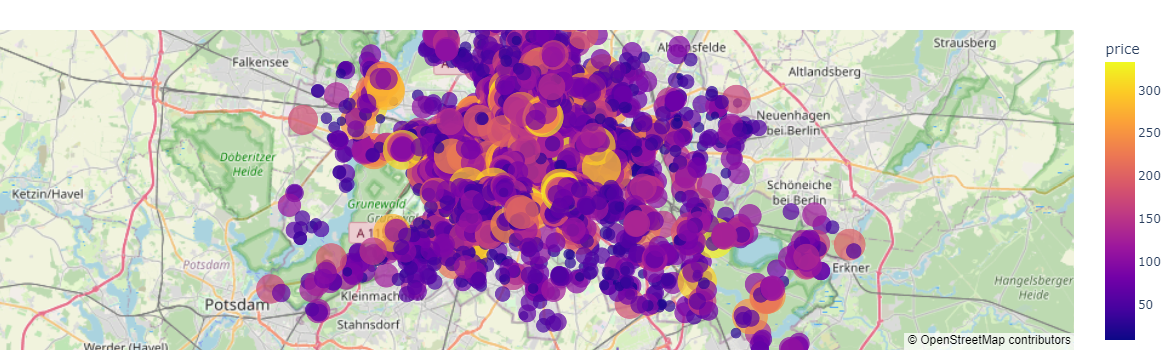

In [ ]:
# plotar os imóveis pela latitude-longitude

df_clean [['name',
            'host_id',
                'number_of_reviews_ltm',
                    'availability_365',
                        'number_of_reviews',
                          'room_type',
                    'price',
'minimum_nights']].copy()
fig = px.scatter_mapbox(df_clean,
                          hover_name= 
                              'name',
                                  hover_data =
                                      ['minimum_nights'],
                                          lat=
                                              'latitude',
                                                  lon=
                                                      'longitude',
                                                  color=
                                              'price',
                                          # 'Curva_ABC',
                                            size = 
                                      'price',          
color_discrete_sequence=['green','blue','red','orange','black'],
#color_continuous_scale=px.colors.cyclical.IceFire,
                    size_max=30,
            zoom=10)
fig.update_layout(mapbox_style= "open-street-map")
fig.update_layout(margin=dict(l=0, r=0, t=30, b=10))
# fig.update_layout(height=300, margin={ "r" : 0 , "t" : 0 , "l" : 0 , "b" : 0 } ) 
fig.show()

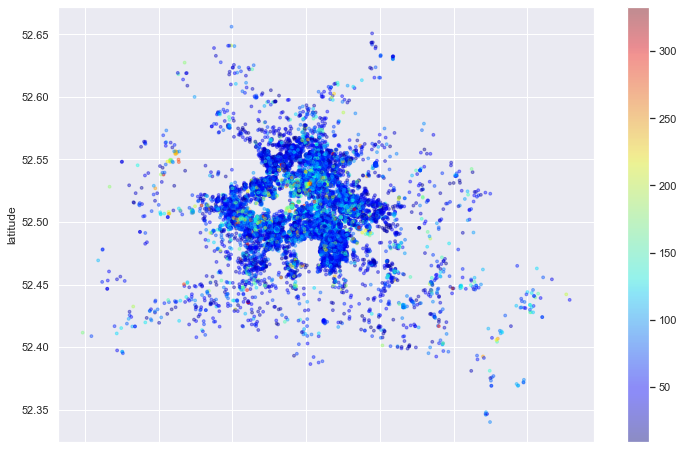

In [ ]:
# plotar os imóveis pela latitude-longitude
df_clean.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df_clean['price'], s=8,
              cmap=plt.get_cmap('jet'), figsize=(12,8));

### **Q7. Qual é a média do mínimo de noites para aluguel (minimum_nights)?**

In [ ]:
# ver a média da coluna `minimum_nights``
print('List Below = Minimo de Noites/Ocupação/Média')
df_clean.minimum_nights.mean()

List Below = Minimo de Noites/Ocupação/Média


2.945456982042348

## Conclusões

Well, let's go.

Caríssimos, apanhei um bocado no sentido de estruturar o projeto de forma lógica e que ficesse algum sentido. 



### Dbian Technology Data Scientist
*Claudio Fabian
*(47) 9.92374737
*fabian.claudio@oulook.com